## Startup -- RSM Template

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edoxrd as xrd
from ipywidgets import interact, fixed, FloatSlider

%matplotlib inline
%config InlineBackend.figure_formats = set(['png'])

Specify the name of the main sample you want to look at, and the directory within which it is found.

In [2]:
d = './example_data/'
%ls {d} # should work on Windows too!

e16014_01_-103_KTO_RSM_2-Theta.asc  e16014_07_t2t_001.ras
e16014_02_-103_PTO_RSM_2-Theta.asc  e16014_09_t2t_002.ras


Some code to find within the directory only the files with `.asc` extension, and store them into lists depending on the index of the reflection. In the example case, only the -103 reflection datafiles are present, so that only the `_103` list (containing both substrate and film files) is generated.

In [3]:
# Linux/Mac OS
_103 = !ls {d} | grep '103' | grep asc
_104 = !ls {d} | grep '104' | grep asc
_002 = !ls {d} | grep '002' | grep asc
# Windows
# _103 = !dir {d} | find '103' | find asc
# _104 = !dir {d} | find '104' | find asc
# _002 = !dir {d} | find '002' | find asc
for index,fname in enumerate(_103):
    print fname
    _103[index] = d+fname
for index,fname in enumerate(_104):
    print fname
    _103[index] = d+fname
for index,fname in enumerate(_002):
    print fname
    _103[index] = d+fname

e16014_01_-103_KTO_RSM_2-Theta.asc
e16014_02_-103_PTO_RSM_2-Theta.asc


## Plot RSMs

/users/zatterin/Documents/sware/edoxrd/read.py:121: RuntimeWarning: divide by zero encountered in log
  I = np.log(d2)


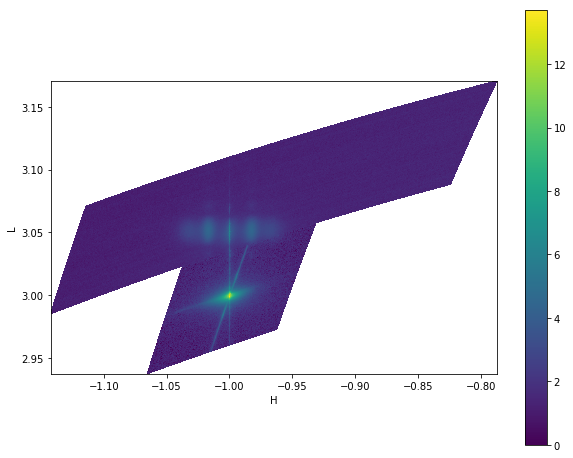

In [4]:
fig = plt.figure(figsize=(10,8))
xrd.plt_rsm(_103[0],_103[1],'film')

## Profiles

In [5]:
dset = _103[1]

In [6]:
h,l,i = xrd.read_rsm_data(dset)
interact(xrd.plt_prof, sample=fixed(dset), scale=fixed('lin'), 
         L=FloatSlider(min=l.min(), max=l.max(), step=0.001, value=l[np.where(i==i.max())].max(), continuous_update=False), 
         H=FloatSlider(min=h.min(), max=h.max(), step=0.0001, value=h[np.where(i==i.max())].max(), continuous_update=False), 
         win=fixed(11), polyorder=fixed(3));

In [10]:
def find_nearest_index(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx

In [11]:
qx,qz,i=xrd.read_rsm_data(dset,coordinates='qspace')
# at what position of qz you want to cut
z = 1.82
# find closets ind


1.81999985444


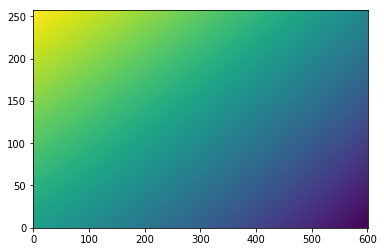

In [19]:
plt.pcolormesh(qz)